<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 10 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 8 September 2022</div>

# Introduction to *Linear Algebra* with NumPy and SciPy

We're done with the **statistics** part of our class (does this mean no more stats? *Noooo*, this means from  now on you know *all* about stats and can apply that knowledge at any time), and now we're starting off on the **linear algebra** part.

<br />
<center>
<img src="ipynb.images/found-ml.png" width=800 />
</center>

We saw how modern Bayesian estimation allows you to leverage computers and packages like `PyMc3` to model data so that you don't need to know a lot of math. It's also true for linear algebra, with packages like `SciPy`. Buy you need to know *some* math, and today we'll cover that *some*.

`NumPy` is for performance. `SciPy` contains all classic (non-probabilistic, which implies machine-learning) scientific algorithms.

I picked 10 important topics in this notebook, important linear algebra stuff you need to make sure you understand, and then we apply it to do **ecology** by leveraging linear algebra to study **graphs**.

## The Math

Linear algebra was founded around the same time as Calculus (think [Leibniz](https://en.wikipedia.org/wiki/Leibniz), circa 1700) by italian, german, and french mathematicians solely for the purpose of solving general systems of linear equations. The coefficients of a system were written in a grid form, with rows corresponding to equations and columns to the unknown variables. 

$$a_1x_1 + a_2x_2 + a_3x_3 + \cdots = y_1\\
b_1x_1 + b_2x_2 + b_3x_3 + \cdots = y_2\\
c_1x_1 + c_2x_2 + c_3x_3 + \cdots = y_3\\
\cdots\\
z_1x_1 + z_2x_2 + z_3x_3 + \cdots = y_{26}$$

> **NOTE**: Rows are *observations* and columns are *features*.

Using a computational tool called the [determinant](https://en.wikipedia.org/wiki/Determinant), researchers were able to solve these systems, opening a world of information about the positions of celestial bodies and large-scale measurements (of geodesic arcs) on the surface of the earth. We also wrote the equations above in a prettier format:

$$A.X = Y$$

with

$$A = \begin{bmatrix}a_1 & a_2 & a_3 & \cdots\\
b_1 & b_2 & b_3 & \cdots\\
c_1 & c_2 & c_3 & \cdots\\
\cdots\\
z_1 & z_2 & z_3 & \cdots\\
\end{bmatrix}$$

$$X = \begin{bmatrix}x_1\\
x_2 \\
x_3 \\
\cdots\\
x_{26}\\
\end{bmatrix}$$

$$Y = \begin{bmatrix}y_1\\
y_2 \\
y_3 \\
\cdots\\
y_{26}\\
\end{bmatrix}
$$

By the 1850’s, [Arthur Cayley](https://en.wikipedia.org/wiki/Arthur_Cayley) was representing matrices as abstract objects. He *defined* matrix multiplication and nurtured matrix theory as its own field, recognizing a vast wealth of theoretical
knowledge underlying the theory of determinants. 

Around turn of the century, a formal system of vector algebra was invented which relied heavily on interpreting matrices as so-called [linear transformations](https://en.wikipedia.org/wiki/Linear_transformation). Linear algebra became a tool for *computation*.

Linear transformations are intuitively those maps of everyday space (Euclidian space) which preserve "*linear*" things.
Specifically, they send lines to lines, planes to planes, etc., and they preserve the origin. No squares, square roots, exponentials, logarithms, or crazy functions like `Beta` and `Gamma`.

<div style="text-align: right; color: gray">1</div>

## Vector spaces

The setting for all of linear algebra is in some high-dimensional **vector space**. Intuitively this is just a collection of objects, which we call **vectors**, like $X$ and $Y$ above with some rules on how you can combine vectors to get other vectors.

>**Definition**: A vector space is a quadruple $(V, F, +, .)$, where $V$ is a set of vectors (points in our space), $F$ is
a scalar field (coefficients), the operation $+$: $V$ x $V$: --> $V$ is a commutative, associative **lambda** to combine vectors, and $.$ is an operation to "*scale*" vectors. 

In addition, we need the following properties to hold:
- Addition and multiplication distribute (as we are used to with traditional algebra).
- There must be an additive identity, which we call $0$, giving $0 + v = v$ for all vectors $v$.
- Every vector must have an additive inverse (every vector $v$ has some vector $w$ such that $v + w = 0$).

Linear algebra is the study of *linear transformations* on **vectors**, which represent points in a finite dimensional space. A **matrix** is a 2D vector. The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  We can also rewrite our equations above with

$$ y_i = \sum_j A_{ij} x_j $$

Einstein notation (worls like a **lambda** function):

$$ y_i = A_{ij} x_j $$

which says:

$$ y_1 = A_{1,1} x_1 + \cdots + A_{1,n} x_n \\
   y_2 = A_{2,1} x_1 + \cdots + A_{2,n} x_n \\
   \vdots \\
   y_n = A_{n,1} x_1 + \cdots + A_{n,n} x_n $$

and can also be viewed as

$$ y = \Bigg[ A_{:,0} \Bigg| A_{:,1} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,0} \Bigg] x_0 + \Bigg[ A_{:,1} \Bigg] x_1 + \dotsb . $$

The notation $A_{i,j}$ corresponds to the python syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column, and $A_{i,:}$ is the $i$th row.  The corresponding python syntax is `A[:,j]` and `A[i,:]`.

We may speak of the (linear) [span](https://en.wikipedia.org/wiki/Linear_span) of a set of vectors as the set of all possible linear combinations of those vectors (like all possible combinations of 3 blue, 2 white, and 1 red ball from an urn). Furthermore, we call a set of vectors **linearly independent** if no vector in the list is in the span of the others. For example, (1,0,0), (0,1,0), and (0,0,1) and are linearly independent in **R**$^3$. Specifically, (1,0,0) cannot be written as a(0,1,0) + b(0,0,1) = (0,a,0) + (0,0,b) for any scalars a and b, and the other two vectors similarly so.

We may describe **subspaces** of a vector space, which are just subsets of which are themselves
vector spaces with the inherited operations. The simplest examples of these are lines, planes, and
hyperplanes through the origin in *R*$^3$. These subspaces are exactly like *derived* objects in Java, which inherit from "*wider*" objects.

>**Definition**: A list of vectors is a **basis** for a vector space if its elements are **linearly independent**, and
their span is the entire vector space (there is no hiddren region in that space that these vectors cannot reach, there is no place on the mountain that you cannot get to). The dimension of a vector space is the length of any basis.
Further, *R*$^n$ admits a very natural basis, often called the **standard basis**:

$$(1, 0, 0, \cdots ,0)\\
(0, 1, 0, \cdots ,0)\\
\cdots\\
(0, 0, 0 \cdots ,1)$$

### Linear Transformations and their Matrix Representations
We may speak of linear transformations (linear maps, or linear **lambdas**) between two vector spaces:

>**Definition**: A function $f$: V $\rightarrow$ W is a **linear map** if it **preserves** the operations of **addition** and **scalar multiplication**. In other words, for all v, w in V and c in F:

$$f(v+w) = f(v) + f(w)\\
f(cw) = cf(w)$$

One remarkable fact that helps us characterize linear maps is that every **linear map** in a space S is determined
**completely** by what it does to a **basis** of S. Since every vector is a linear combination of basis elements,
say $x = a_1v_1 + \cdots a_nv_n$, we see that a linear map plays nicely:

$$f(x) = f(a_1v_1 + \cdots a_nv_n) = a_1f(v_1) + \cdots + a_nf(v_n)$$

In other words, if we know what $f$ does to a basis, then we know everything about $f$! In order to aid our
computations, we write what $f$ does to each basis vector in a tabular form:

$$ \Bigg[\; f(v_1) \;\Bigg| \;f(v_2) \;\Bigg|\; \dotsm \Bigg|\; f(v_n)\; \Bigg] $$

The $j$th column corresponds to $f(v_j)$, and the $i$th row corresponds to the $i$th coefficient in the expansion
of in $f(v_j)$ terms of the basis for W. Here the vertical bars indicate that each element is a column of
scalars.

The representation above is called the **matrix** representation of $f$. And now you know what matrices are: They help us describe **linear** functions.

Consider the map (or **lambda**) $f$ on **R**$^3$ defined as $(x,y,z)$ --> $(y, x, 2z + y)$. Write down the lambda for this map here below and find the transformation of the vector (3, 1, 1):

<div id="theID" style="display: none;">
f = lambda x, y, z: (y, x, 2*z + y)
f(3,1,1)    
</div>

In [36]:
#def f(x, y, z):
#    return (y, x, 2*z +y)

f = lambda x, y, z: (y, x, 2*z +y)
f(3,1,1)

(1, 3, 3)

Now write down the transformation through $f$ of the standard basis $(e_1, e_2, e_3)$ in **R**$^3$:

<div id="theID" style="display: none;">
print(f(1,0,0))
print(f(0,1,0))
print(f(0,0,1))    
</div>

In [1]:
e1 = (1,0,0)
e2 = (0,1,0)
e3 = (0,0,1)

...

Ellipsis

In [40]:
e1 = (1,0,0)
e2 = (0,1,0)
e3 = (0,0,1)
np.array([1,0,0]) + np.array([0, 0, 1]) == np.array([1,0,1]) #=e1 + e3

array([ True,  True,  True])

$$\begin{matrix}  1 \; 2 \\ 3 \; 4  \end{matrix}$$

In other words, $f(e_1) = e_2$, $f(e_2) = e_1 + e_3$, and $f(e_3) = 2*e_3$. 

So this is the matrix for $f$:

$$\begin{bmatrix} 0 \; 1 \;  0 \\
1 \;  0 \; 0 \\
0 \; 1 \; 2 \end{bmatrix}$$

So this says that:

$$\begin{bmatrix} 0 \; 1 \;  0 \\ 
1 \;  0 \; 0 \\
0 \; 1 \; 2 \end{bmatrix}  * 
\begin{bmatrix} 3 \\
1 \\
1 \end{bmatrix} =
\begin{bmatrix} 1 \\
3 \\
3 \end{bmatrix}$$

And so we see that instead of computing f(3,1,1) as a lambda, which is what we did in the cell above, we can actually compute f(3,1,1) as a matrix mutliplication. That is a true fact *for all linear maps*!

Now, write down the matrix representation of $f$ with respect to the standard basis as a `NumPy` array instead of in markdown, here below (replace the 0s to repdroduce the matrix above):

<div id="theID" style="display: none;">
np.array([[0,1,0],[1,0,0],[0,1,2]])   
</div>

In [2]:
import numpy as np

np.array([[0,0,0],[0,0,0],[0,0,0]]) 

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

And now the do matrix mutliplication in the cell below instead of in markdown, to obtain f(3,1,1) as a matrix multiplication operation:

<div id="theID" style="display: none;">
import numpy as np
#np.dot(np.array([[0,1,0],[1,0,0],[0,1,2]]), np.array([3,1,1]))
np.array([[0,1,0],[1,0,0],[0,1,2]]) @ np.array([3,1,1])
</div>

In [3]:
np.array([[0,0,0],[0,0,0],[0,0,0]]) @ np.array( [0,0,0] ) 

array([0, 0, 0])

So we see that if we take a (column) vector $X$ in V, and multiply it on the left by our matrix above, the resulting
vector is precisely the coordinate representation of $f(x)$ with respect to the basis for W. 

>**NOTE**: The rules for matrix multiplication were constructed very particularly *so that this would be the case*. In this way, we may arbitrarily switch between viewing $f$ as a transformation or as a vector computation. Compositions of linear maps translate to multiplication of two matrices, and matrix inversion (if it exists) is precisely *function inversion*.


Here's an elementary example of **function inversion**, related to the map $(x,y)$ $\rightarrow$ $(3x - 2y, 5x + y)$:
```python
v = 3*x - 2*y
w = 5*x + y
```
Given $v = 3$ and $w = 1$, what are $x$ and $y$?

You have to solve 2 linear equations of 2 unknowns. We already did this with MOM. Solve the first equation for x (as a function of y). Then plug x into the second equation. Get the solution for y. Then plug in the value of y in the first equation. Get x. Simple!

But there is a more mechanistic way of doing this, which works for 2 equations of 2 unknowns or 100 equations of 100 unknowns. And computers can do it really well, too!

$$ \begin{bmatrix} v \\ w \end{bmatrix} = \begin{bmatrix} 3 \; 2 \\ 5 \; 1 \end{bmatrix} * \begin{bmatrix} x \\ y \end{bmatrix}$$

Multiplying both sides by the inverse of the 2x2 matrix:

$$ \begin{bmatrix} 3 \; 2 \\ 5 \; 1 \end{bmatrix}^{-1} \begin{bmatrix} v \\ w \end{bmatrix} = \begin{bmatrix} 3 \; 2 \\ 5 \; 1 \end{bmatrix}^{-1} \begin{bmatrix} 3 \; 2 \\ 5 \; 1 \end{bmatrix} * \begin{bmatrix} x \\ y \end{bmatrix}$$

Simplifying:

$$ \begin{bmatrix} 3 \; 2 \\ 5 \; 1 \end{bmatrix}^{-1} \begin{bmatrix} v \\ w \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix}$$

Using numpy:

In [45]:
import numpy as np 

A = np.array([[3,2],[5,1]]) 
B = np.linalg.inv(A) 

print (A)
print()
print (B) 
print()
#print (np.dot(A,B))
print (A @ B)

[[3 2]
 [5 1]]

[[-0.14285714  0.28571429]
 [ 0.71428571 -0.42857143]]

[[ 1.00000000e+00 -1.11022302e-16]
 [-1.11022302e-16  1.00000000e+00]]


And so, for  𝑣=3  and  𝑤=1 , 𝑥  and  𝑦 are:

In [46]:
V = np.array([3,1])
X = np.dot(B,V) # B @ V
print (X)

[-0.14285714  1.71428571]


Verify:

In [59]:
print (np.dot(A,X))

[3. 1.]


Of course, there are many different bases we could have chosen. Even though we are going from **R**$^3$ to **R**$^3$, the column basis could be different from the row basis. Fortunately for our purposes, we are
not going to consider what basis is appropriate to choose. All that matters is that fixing a basis, the
matrix representation of a linear map is unique, and so we may interchange the notation freely. Even so,
the truly interesting things about matrices are those properties which are true *no matter which basis we
prefer to use*.

### What do I need to remember?
A Matrix is a **spreadsheet** that describes **linear transformations**, and Matrix multiplication is ***how your transform (linearly)***. 

Specifically, the columns of the matrix describing the transformation are the mappings of the basis vectors of your underlying vector space.

Think about linear transformations as **rigid movements in state space**. Finding the **inverse** of a transformation represents *going back in time* to find our starting point, and we all *know how statistics is all bout building a time machine*, so we know how important matrix inversions are, and now you know how to do them!

>**NOTE**: Remember, finding the solution to a computational problem (like Bayesian estimation) is usually locating a global maximum (or minimum) in your state space that maximizes (or minimizes) a **cost function** (Metropolis' cost function is the probability of observing the data with the model at hand). The cost function is your ***mountain***, and you're climbing the mountain to try to get to its **peak**. At the peak, the derivative is zero, and the function is at its maximum. That is your solution.

There are tons of different kinds of vector spaces. Many of these are surprising and counter-intuitive. For our purposes, however, we may stick with nice, small vector spaces. So here is a simple vector space that we will use in class: Climbing mountains!


### The mountain vector space

How do you **move** from one point on the mountainside to another point on the mountainside? You get your location (it's a **vector**), you multiply by a **matrix** (which is a vector transformation), and you get to another location (a different vector). Each step is a matrix multiplication. Since each step can be different, each matrix can be different.

In our Metropolis notebook, we had a model with two parameters. We fixed one paprameter and we moved along a **single axis**, so that was simple: add or subtract a delta. But if you move in 2D, 3D, or nD space, you move by taking your current coordinates in that space, mutliplying by a matrix, and getting to new coordinates.

</br >
<center>
<img src="ipynb.images/elCapitan.gif" width=400 />
</center>

So, today we're going to learn how to move on mountains with python :-) 

<div style="text-align: right; color: gray">2</div>

## Multiplication and basic operations of Matrices

Basic linear algebra is all about learning how spreadsheets *multiply*:

</br >
<center>
<img src="ipynb.images/matrix-multiply-constant.gif" width=400 />
Multiplying a matrix by a constant
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-a.svg" width=400 />
Multiplying a matrix with another, **first row, first column**
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-b.svg" width=400 />
Multiplying a matrix with another, **first row, second column**
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-c.svg" width=400 />
Multiplying a matrix with another, **final result**
</center>

</br >
<center>
<img src="ipynb.images/matrix-identity.gif" width=200 />
A Matrix that when multiplied by another, does not change it
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-order.gif" width=400 />
Order matters
</center>

`numpy.zeros_like()` returns an array of zeros with the same shape and type as a given array.

In [47]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
pyplot.style.use('ggplot')

def matmult1(A, x):
    """Entries of y are dot products of rows of A with x"""
    y = np.zeros_like(A[:,0])
    for i in range(len(A)):
        row = A[i,:]
        for j in range(len(row)):
            y[i] += row[j] * x[j]
    return y

def matmult2(A, x):
    """Same idea, but more compactly"""
    y = np.zeros_like(A[:,0])
    for i,row in enumerate(A):
        y[i] = row.dot(x)
    return y

def matmult3(A, x):
    """y is a linear expansion of the columns of A"""
    y = np.zeros_like(A[:,0])
    for j,col in enumerate(A.T):
        y += col * x[j]
    return y

# Define matrix and vector
x = np.array([0,1,2])
A = np.array([[2,1,2],[3,2,0],[1,0,1]])

print("A =")
print(A)
print()
print("x =")
print(x)
print()
print("Ax =")
print(matmult1(A, x))
print(matmult2(A, x))
print(matmult3(A, x))

A =
[[2 1 2]
 [3 2 0]
 [1 0 1]]

x =
[0 1 2]

Ax =
[5 2 2]
[5 2 2]
[5 2 2]


If you use an earlier version of Python (than 3.5), the `@` operator isn't defined yet. To perform matrix multiplication, you need to use `numpy.dot(A,B)` in place of `A@B`. That will require you to start with `import numpy` before doing any of this. But hey, I think `@` rocks!

In [49]:
import numpy as np

# matrix-vector product
y = A @ x
print("A =")
print(A)
print()
print("x =")
print(x)
print()
print("Ax =")
print(np.dot(A,x))
print(A @ x)

A =
[[2 1 2]
 [3 2 0]
 [1 0 1]]

x =
[0 1 2]

Ax =
[5 2 2]
[5 2 2]


In [50]:
# element-wise operations
x[0] = 1
A[0,1] = 2
print()

# extracing rows and columns
print("A[1,:] = ")
print(A[1,:])
print()
print("A[:,1] = ")
print(A[:,1])
print()

# copy matrix
B = A.copy()
print("B = ")
print(B)
print()

# transpose
print("B.T = ")
print(B.T)


A[1,:] = 
[3 2 0]

A[:,1] = 
[2 2 0]

B = 
[[2 2 2]
 [3 2 0]
 [1 0 1]]

B.T = 
[[2 3 1]
 [2 2 0]
 [2 0 1]]


<div style="text-align: right; color: gray">3</div>

## Mountain workout: For data science Tomb Raiders!

<br />
<center>
<img src="ipynb.images/tomb-raider.gif" width=300 />
</center>

In [53]:
import numpy as np

# Define vector: position of mountain climber
x = np.array([0,1,2])
print("initial: ", x)
print('---')

# Define matrix: jump-twist-and-half-with-three-spins-and-one-amazing-handhold. Tomb raider style! 
Twist = np.array([[2,1,2],[3,2,0],[1,0,1]])
print("Twist matrix: ")
print(Twist)
print('---')

# Define matrix: rappel with rope over a dangerous cliff
Rappel = np.array([[5,3,1],[4,0,1],[3,2,-1]])
print("Rappel matrix: ")
print(Rappel)
print('---')

# Position of mountain climber after jump-twist
y = Twist @ x
print("After jump-twist: ", y)
print('---')

# position of mountain climber after rappel following jump-twist
z = Rappel @ y
print("After rappel: ", z)
print('---')

# Combination jump-twist and rappel
Combo = Rappel @ Twist
print("Combo matrix: ")
print(Combo)
print('---')

# position of climber from initial position after combination jump-twist and rappel
z2 = Combo @ x
print("After combo: ", z2)
print(z == z2)
print('---')

# Inverse of Combo
Cinv = np.linalg.inv(Combo)
print("Inverse of Combo matrix: ")
print(Cinv)
print('---')

# Initial position of climber:
x2 = Cinv @ z2
print("Initial position of climber: ", x2)
print(x2)
print(x)
print(np.isclose(x2, x))
print('---')

initial:  [0 1 2]
---
Twist matrix: 
[[2 1 2]
 [3 2 0]
 [1 0 1]]
---
Rappel matrix: 
[[ 5  3  1]
 [ 4  0  1]
 [ 3  2 -1]]
---
After jump-twist:  [5 2 2]
---
After rappel:  [33 22 17]
---
Combo matrix: 
[[20 11 11]
 [ 9  4  9]
 [11  7  5]]
---
After combo:  [33 22 17]
[ True  True  True]
---
Inverse of Combo matrix: 
[[ 0.75438596 -0.38596491 -0.96491228]
 [-0.94736842  0.36842105  1.42105263]
 [-0.33333333  0.33333333  0.33333333]]
---
Initial position of climber:  [-5.55111512e-16  1.00000000e+00  2.00000000e+00]
[-5.55111512e-16  1.00000000e+00  2.00000000e+00]
[0 1 2]
[ True  True  True]
---


<div style="text-align: right; color: gray">4</div>

## Special operations with arrays

<br />
<center>
<img src="ipynb.images/batgirl.gif" width=360 />
</center>

### Inner products, orthogonality, and Matrix norms

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about the **magnitude** and about the **angle** formed by the two vectors. Think about it this way: the magnitude, or **norm**, of a vector tells the mountain climber how far she is from her starting point (origin). The **angle** between two vectors tells someone at the origin what the viewing angle is between one climber (one vector), and the other climber (the other vector).

The **norm** of a vector is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$

The **angle** $\theta$ between the two vectors is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$

Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties

$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split}  $$

The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X $$


If $x^T y = 0$ then we say $x$ and $y$ are **orthogonal** (or "$x$ is orthogonal to $y$"). The cosine of the angle between the two vectors is 0, which means the angle formed by the two vectors is a 90 degree angle. If you see one climber due north, the other climber is due east (or west)!

A vector is said to be **normalized** if $\lVert x \rVert = 1$. It's as if the mountain climber needs to be exactly, say 1km from the origin, in whatever direction.

If $x$ is orthogonal to $y$ and $\lVert x \rVert = \lVert y \rVert = 1$ then we say $x$ and $y$ are **orthonormal**. That's when two climbers are at distinct cardinal points (east, west, north, south), at exactly 1 km. from the origin.

In 2D, there are 4 cardinal points, forming two directional axes. In $n$D, there are $2n$ cardinal points forming $n$ directional axes.

A square matrix with **orthonormal** column vectors is said to be an **orthogonal matrix**. If you have $n$ mountain climbers, and your state space is $n$-dimensional, then an orthonormal square matrix is like observing your mountain climbers at each of the distinct $n$ axes of your state space. Together, they form an $n$-dimensional *unit* **hypercube**.

We typically use $Q$ or $U$ and $V$ for matrices that are known/constructed to be orthogonal.
Orthogonal matrices are always full rank -- the columns are **linearly independent**. That means no one column can be written as a linear combination of any of the other ones. No mountain climber's position described by one of these column vectors is a linear combination of other mountain climber's positions described by the other column vectors. This makes these column vectors a **base** of the underlying vector space: Any vector of that vector space can be written as a linear combination of these column vectors. Any $(n+1)$th mountain climber's position can be written as a linear combination of the position of the other mountain climbers.

The inverse of an **orthogonal** matrix is its **transpose**:
$$ Q^T Q = Q Q^T = I . $$

That's nice because transposing a matrix is super easy. Finding the inverse of a non-orthogonal matrix is **hard**. The runtime complexity is bounded by $O(n^3)$. Orthogonal matrices are a powerful building block for robust numerical algorithms.

`np.linalg` contains basic linear algebra operations, like norms and [Frobenius norm] (square root of the sum of the absolute squares of its elements). See [MathWorld](http://mathworld.wolfram.com/FrobeniusNorm.html).

Vector norms are built into the linear space (and defined in term of the inner product).  Matrix norms are *induced* by vector norms, according to

$$ \lVert A \rVert = \max_{x \ne 0} \frac{\lVert A x \rVert}{\lVert x \rVert} . $$

* Try to see how **far away** a mountain climber can move, from any starting position - That's the matrix norm and it's a function of the mountain, not of the climber!
* This equation makes sense for non-square matrices -- the vector norms of the input and output spaces may differ.
* Due to linearity, all that matters is direction of $x$, so it could equivalently be written

$$ \lVert A \rVert = \max_{\lVert x \rVert = 1} \lVert A x \rVert . $$

Norms are the metrics that learning machines use to minimize learning constraints.

Whew! That was a lot of math, right? But it was *fun*, when you think of it as **mountain climbers** :-)

### Special matrices
Here we learn how to use `numpy` to write some very useful arrays we are going to need.

In [54]:
# all ones or zeros
y = np.zeros(4)
print(y)
print()
F = np.ones((4,4))
print(F)
print()

# normally distributed random elements
#  array of shape (d0, d1, ..., d4), filled with random floats sampled from a univariate “normal” (Gaussian) distribution 
# of mean 0 and variance 1. A single float randomly sampled from the distribution is returned if no argument is provided.
r = np.random.randn(2,2,2)
print(r)
print()

# identity matrix
I = np.eye(3)
print(I)
print()

# banded matrix
L = np.diag([1,1],k=-1)
print(L)

[0. 0. 0. 0.]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[[-0.11284044 -1.24333758]
  [ 0.85461722  0.34032924]]

 [[ 0.86844049 -0.48287843]
  [ 0.66330045 -2.59637006]]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[0 0 0]
 [1 0 0]
 [0 1 0]]


**Exercise**: Create a 4 x 4 matrix with $a_{ii} = 2$, $a_{i,j!=i} = 1$

In [55]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [56]:
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

<div id="theID" style="display: none;">
np.eye(4,4) + np.ones((4,4))
</div>

In [4]:
...

Ellipsis

<div style="display:none;">
np.ones((4,4)) + np.eye(4)   
</div>

$a_{i,i-2}$ = 0 that means $a_{i,j}$ = 0 for any i and j such that j = i - 1

**Exercise**: Create a 10 x 10 matrix with $a_{ii} = 2$, $a_{i,i+1} = a_{i,i−1} = 1$, and 0 otherwise.

In [59]:
np.diag(np.ones(9), k=-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [60]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<div id="theID" style="display: none;">
a = 2 * np.eye(10) + np.diag(np.ones(9),k=1) + np.diag(np.ones(9),k=-1)
a
</div>

In [5]:
 # Create a 10 x 10 matrix with  𝑎𝑖𝑖=2 ,  𝑎𝑖,𝑖+1=𝑎𝑖,𝑖−1=1 , and 0 otherwise
...


<div style="display:none;">
np.diag(np.ones(9),k=-1) + np.diag(np.ones(9),k=1)  + 2 * np.eye(10)  
</div>

<div style="text-align: right; color: gray">5</div>

## Inverting matrices

Matrix multiplication is *not* **commutative**, as we saw earlier.

In [63]:
B = np.array([[2, 3],[0, 4]])
print(B)
print()
print(B @ B.T)
print()
print(B.T @ B)
print()
print(B.T @ B == B @ B.T)

[[2 3]
 [0 4]]

[[13 12]
 [12 16]]

[[ 4  6]
 [ 6 25]]

[[False False]
 [False False]]


However, matrix multiplication is **associative**:

$$ A. (B.C) == (A.B) .C$$

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.

We use `numpy.linalg.inv()` to evaluate the inverse of a matrix, as we saw above.

Matrix multiplication is associative! And we can follow the actions of state machines on vector states with matrix multiplication, which is just a math operation that defines how we mutliply spreadsheets together!

We can use [numpy.linalg.solve()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.solve.html) to solve a linear system of equations.

For example, what is a mountain climber's position $x$ such that $C$ $x$ = $z$ where $z$ is the column vector (33, 22, 17)?

$$ C x = z$$

In [64]:
C = np.array([[20, 11, 11],[9, 4, 9], [11, 7, 5]])
z = np.array([33, 22, 17])
solution = np.linalg.solve(C, z)
solution

array([-1.24344979e-15,  1.00000000e+00,  2.00000000e+00])

Wow, that's the initial position of our mountain climber! So linear algera is just.. mountain-climbing! And to think that I was scared of math once upon a time... 

In [65]:
#verify
C @ solution

array([33., 22., 17.])

In [66]:
# additionally
Cinv = np.linalg.inv(C)
print(Cinv @ C)
print('---')
print()
print(C @ Cinv)
print('---')
print()
print(np.linalg.solve(C, C))
print('---')

[[ 1.00000000e+00  5.55111512e-16  7.77156117e-16]
 [-2.22044605e-15  1.00000000e+00  1.33226763e-15]
 [ 2.77555756e-16  4.99600361e-16  1.00000000e+00]]
---

[[ 1.00000000e+00 -7.21644966e-16 -1.05471187e-15]
 [ 6.66133815e-16  1.00000000e+00 -4.99600361e-16]
 [ 1.11022302e-15 -1.66533454e-16  1.00000000e+00]]
---

[[ 1.00000000e+00  6.10622664e-17  0.00000000e+00]
 [ 2.33731163e-16  1.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
---


### Exercise:

Solve the elementary linear algebra question at the introduction of this notebook:

>Here's an elementary example of **function inversion**, related to the map $(x,y)$ $\rightarrow$ $(3x - 2y, 5x + y)$:
>```python
v = 3*x - 2*y
w = 5*x + y
```
>Given $v = 3$ and $w = 1$, what are $x$ and $y$?

In [67]:
C = np.array([[3,-2],[5,1]])
z = np.array([3,1])
solution = np.linalg.solve(C,z)
solution

array([ 0.38461538, -0.92307692])

<div style="display:none;">
import numpy as np

C = np.array([[3, 2],[5, 1]])
z = np.array([3, 1])
solution = np.linalg.solve(C, z)
solution
</div>

<div style="text-align: right; color: gray">6</div>

## Eigenvalues and eigenvectors

Tony Stark, a.k.a. Iron man, [thinks](https://youtu.be/5h3G4vKCiFE) they're important... And [here's](https://www.yahoo.com/video/quantum-mechanics-avengers-endgame-fact-130116000.html) the fact-check by scientists.

<br />
<center>
<img src="ipynb.images/iron-man.jpg" width=900 />
</center>

>**Definition**: A scalar $\lambda$ is an **eigenvalue** for the linear map A (A is the matrix of the linear map) if there exists a non-zero vector $V$ such that $Av = \lambda v$. Any such vector which satisfies this equation is said to be an **eigenvector** of A, corresponding to the eigenvalue $\lambda$.

Eigenvectors and eigenvalues have a huge number of [applications](http://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Applications), including facial recognition
software, geology, quantum mechanics, and web search. So being able to find them quickly is of great significance to researchers and engineers. What’s interesting is that while eigenvectors depend on a choice of basis, eigenvalues do not.

### Again: What is an eigenvector?

* A Matrix is a mathematical object that acts on a (column) vector, resulting in a new vector, i.e. A**x**=**b**. It represents a **move**, in any direction, for a mountain-climber, such as Tomb Raider.

* A vector is like an arrow pointing to a location on the mountain. An **eigenvector** $v$ is a **position on the mountain** $x$ such that ***for a class of mountain moves described by a matrix $C$***, the resulting position (or vector) $y$ following that mountain move is **parallel** to the original position $x$ (some multiple of $x$). 

It's as if the **new position** of the mountain climber is **in the same direction** as defined by her previous position and the origin (where she started her climb):

$$ {C}\underline{x}=\lambda \underline{x} $$

$\lambda$ is its **eigenvalue**. It's **how much** the mountain climber moved from the previous position.


### Again: What are eigenvalues?

Given $A \in \mathbb{R}^{n\times n}$, $\lambda$ is the **eigenvalue** of $C$ if there is a non-zero vector $x$, the corresponding **eigenvector**, such that the following is true:

$$Cx = \lambda x, \;\; \text{for} \; x \neq 0$$

Is there a move that can take a mountain-climber to *some factor* times her original position? If so, the old position is an eigenvector, and the moving factor is its eigenvalue.

Formally, given a square matrix $C \in \mathbb{R}^{n\times n}$, we say that $\lambda \in \mathbb{C}$ is an **eigenvalue** of $C$ and $x \in \mathbb{C}^n$ is the corresponding **eigenvector**.

Intuitively, this definition means that multiplying $C$ by the vector $x$ results in a new vector that points in the same direction as $x$, but is scaled by a factor $\lambda$.

Also note that for any **eigenvector** $x \in \mathbb{C}^n$ **of $C$**, and scalar $k \in \mathbb{C}, C(kx) = kCx = k\lambda x = \lambda(kx)$, so $kx$ is also an **eigenvector of $C$**. For this reason when we talk about **“the” eigenvector** associated with $\lambda$, we usually assume that the **eigenvector** is normalized to have length $1$ (this still creates some ambiguity, since $x$ and $−x$ will both be **eigenvectors**, but we will have to live with this).

For any $\lambda$ an eigenvalue of $C$, there is a vector space, the **eigenspace**, that corresponds to $\lambda$:

$$\{ x : C x = \lambda x \}$$

Any non-zero vector in this space is an eigenvector. One convenient requirement is that the eigenvector has norm $1$.


### What are eigenvectors and eigenvalues for mountain climbers?

Linear algebra is multiplying vectors (mountain climbers positions) with matrices (technical mountain climber moves), to get to a new mountain position. So what corresponds to an eigenvector, then?

***For a specific technical move described by a matrix***, there is a mountain climber position such that her next position will be parallel to her previous position. In other words, an observer at the origin looking at his mountain climber girlfriend very far away through binoculars ***will not have to adjust his binoculars to continue to observe her***: She just either moved a bit closer or a bit further away from him, but remained in the same direction relative to him. If we call the factor by which she moved closer or further away $\lambda$, her previous position $x$, and her next position $y$, and the technical mountain move $T$, then:

$$ y = T \; x = \lambda x$$

<br />
<center>
<img src="ipynb.images/binoculars.jpg" width=400 />
</center>

There is a theorem in linear algebra that says that (almost) all technical mountain moves have such mountain positions $x$. In fact, an $n$ x $n$ matrix $T$ has $n$ such vectors.

What's the big deal? We'll see that soon..

## Eigenvectors in physics

>Eigenvectors and eigenvalues are ubiquitous because they characterize linear transformations: operations that stretch, squeeze, rotate or otherwise change all parts of an object in the same way. Physicists use them to characterize transformations, for example how neuttinos transform as they travel though planet Earth.

</br >
<center>
<img src="ipynb.images/eigenvectors-of-change.jpg" width=600 />
</center>

>Read here about how a [neutrino experiment](https://getpocket.com/explore/item/neutrinos-lead-to-unexpected-discovery-in-basic-math?utm_source=pocket-newtab) led to an unexpected discovery about eigenvectors and eigenvalues.

<div style="text-align: right; color: gray">7</div>

## Eigenvalues and eigenvectors in SciPy

Turns out `scipy` also has a good amount of linear algebra functionality. Which library to pick, `NumPy` or `SciPy`? *Your* choice.

</br >
<center>
<img src="ipynb.images/hi.png" width=200 />
</center>

### Exercise

What are the eigenvalues and eigenvectors of our Combo mountain jump?

In [68]:
import scipy as sp
import scipy.linalg as la

C = np.array([[20, 11, 11],[9, 4, 9], [11, 7, 5]]) 

(eigenvalues, eigenvectors) = la.eig(C, left = False) # You can read the help, buy the left eigenvectors don't get created without this. 

d = sp.diag(eigenvalues)  # by default, eig puts the eigenvalues in a 1-D array. We will need a diagonal matrix in a moment.

print(eigenvalues)
print()
print(eigenvectors)
print()
print(d)

[31.57174825+0.j  0.57393335+0.j -3.1456816 +0.j]

[[-0.80213043 -0.59657254  0.15749753]
 [-0.40505528  0.73786379 -0.84403635]
 [-0.43876758  0.31568692  0.51263747]]

[[31.57174825+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.57393335+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -3.1456816 +0.j]]


d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  


In [69]:
R = np.random.randn(4,4)
print(R)
print()
(eigenvalues, eigenvectors) = la.eig(R, left = False)
print(eigenvalues)
print()
print(eigenvectors)

[[ 0.04062497 -0.80898306 -0.23189334 -0.84625552]
 [-0.33565076 -0.05578819  1.18902408 -0.75784418]
 [ 0.06953809  0.34582303  0.16853679 -0.89159453]
 [ 0.59981336  0.2240737  -0.79475173  0.57068018]]

[ 1.40750925+0.j         -0.7511252 +0.j          0.03383485+0.62973694j
  0.03383485-0.62973694j]

[[-0.21906262+0.j          0.08278186+0.j          0.82520824+0.j
   0.82520824-0.j        ]
 [ 0.69838898+0.j         -0.58856546+0.j         -0.01416376-0.21957118j
  -0.01416376+0.21957118j]
 [ 0.50878394+0.j          0.66022329+0.j          0.30734327-0.23978053j
   0.30734327+0.23978053j]
 [-0.45321442+0.j          0.45917651+0.j         -0.0640579 -0.33846898j
  -0.0640579 +0.33846898j]]


In [70]:
np.linalg.inv(R)

array([[ 0.47835156,  2.0264848 , -0.37637276,  2.81242548],
       [-0.85383832, -0.57234831,  1.050937  , -0.38428976],
       [-0.10497821,  1.52978224, -0.60339807,  0.93311768],
       [-0.31371435,  0.22522709, -0.85737269,  0.24668063]])

If the mountain climber starts at any of the three positions described by the eigenvectors, she will end up facing in the same direction (from the perspective of her observer boyfriend at the origin of the mountain), just slightly closer or further away from him, by a factor of the eigenvalue associated with the eigenvector.

<div style="text-align: right; color: gray">8</div>

## Application of Eigenvectors: Markov Chains

A **Markov chain** is any *memorlyess* process that can be modeled with a *stochastic transition* matrix. It's like a mountain climber that always forgets her previous position, and only cares about the next (which is the right state of mind if you're climbing *El Capitan* in Yellowstone National Park! Did you see the movie *Free Solo*? Scariest movie *ever*!)

<br />
<center>
<img src = ipynb.images/moody.png width = 600 />
    Moody's credit rating transitions
</center>
<br />

### Repeated transitions
Conjecture: If the transition matrix $P$ is the same after each step (time homogeneous), then the k-step transition probability is.. the k-th power of the transition matrix, $P^k$.

I don't think I need to convince you of this, we illustrated this with the mountain climber and the Combo matrix!

And so, the k-step transition is characterized by the matrix $A^k$.

### Steady state limit
Now what if, in the long term, after many powers of $k$, we suddenly transition to a condition where the states don't change very much? Well, we acheive what is called a **steady-state** condition: 

$$P^{\;k+1} = P^{\;k} \;\text{, for  very large} \; k$$

Stationary distributions are super-interesting to Wall Street, because they describe the ***future***! Suppose we call that future the state vector $\pi$. Then:

$$\pi = P . \pi$$

Hey, wait a second, does that equation remind you of anything?


### Eigenvectors and.. the *future*
The eigenvectors $X_1, \cdots X_n$ of $n$ x $n$ matrix $A$, and its associated eigenvalues $λ_i$, are such that:

$$A X_i = λ_i X_i$$

And so the **future**, described as state vector $\pi$, is the ***eigenvector associated with the eigenvalue 1***!

**Google** realized that this corresponds to the steady state condition of a sliver surfer surfing the Web through its hyperlinks. It descibes the probabilistic future state of the sliver surfer. If you rank all of its components from highest probability to lowest probability, it's the Google search page for your search query (corresponding to a silver surfer surfing for Web pages relevant to your query terms)!

Assume the mountain climber climbs the entire mountain using just one type of jump, let's call this the **Twist** matrix jump.

Imagine that we are able to represent any position on the mountain as a **linear combination of eigenvectors** of the **Twist** matrix. That, in fact, is a ***theorem*** that is true if the **Twist** matrix is **non-singular** (has a non-zero [determinant](https://en.wikipedia.org/wiki/Determinant)).

To find the mountain climber's position after $n$ **Twist** jumps, we multiply her position vector by the **Twist** matrix, $n$ times, right? Which corresponds to a single multiplication by the matrix **Twist$^n$** (**Twist** to the power $n$), right? Each application of **Twist** adds a factor of the eigenvalue $λ$ to the coefficient of each eigenvector in the expansion of the state. Recall: The eigenvectors don’t transform much.. They just squish or expand (by a factor of $λ$). So after $n$ transitions, the coefficient of each eigenvector has gained a factor $λ^n$.

If λ > 1, this factor would grow without bound as $n$ increases, leading to matrix elements larger than 1, which would catapult the mountain climber to the moon! So, there must not be any eigenvalue strictly larger than one!

If λ < 1, this factor would suppress the contribution of the corresponding eigenvector as $n$ increases. It’s fine if this happens to some eigenvectors, but if it happens to *all of them*, the probability interpretation of our state vector would also be ruined, because all entries in our vector would be driven to zero, and the mountain climber would **never move**.

So, **there must be at least one eigenvalue greater or equal to one!**

The **dominant eigenvector** (eigenvector corresponding to the eigenvalue = 1) of any Markov chain *is* the **steady-state limit (the *long-term future*) of the Markov chain**!

The dominant eigenvector will become the *only unsuppressed contribution* to the state vector as $n$ gets large.
This eigenvector therefore represents the steady-state towards which every **linear system** tends to.

The dominant eigenvector is the future of Markov chains. That is why we love Markov chains: With a bot of math, wwe can predict their future!

So if we start with a random vector (random mountain climber position), and apply the **Twist** matrix a million times, we will ultimately converge to the dominant eigenvector, since all other eigenvalue-to-the-power-a-million contributions will become suppressed. 

>It's the same method used by Google to rank the WWW!


### Exercise 1

Find the eigenvalues and eigenvectors of the following matrix as well as the inverse of the matrix minus the identity matrix. Then, the square of that matrix. Use `sympy`, a symbolic math manipulation program.
```(python)
pip install sympy
```

$$ {A}=\begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & -2 \\ 0 & 1 & 4 \end{bmatrix} $$

In [69]:
from sympy import Matrix
A = Matrix([[1,2,3], [0,1,-2], [0,1,4]])
A

Matrix([
[1, 2,  3],
[0, 1, -2],
[0, 1,  4]])

In [70]:
# eigenvalues
A.eigenvals()

{3: 1, 2: 1, 1: 1}

<div style="display:none;">
A.eigenvals()    
</div>

In [71]:
# eigenvectors
A.eigenvects()

[(1, 1, [Matrix([
   [1],
   [0],
   [0]])]), (2, 1, [Matrix([
   [-1],
   [-2],
   [ 1]])]), (3, 1, [Matrix([
   [1/2],
   [ -1],
   [  1]])])]

<div style="display:none;">
A.eigenvects()  
</div>

### Exercise 2

Compute the eigenvalues and eigenvectors of the following upper triangular matrix:

In [72]:
A = Matrix([[3, 1], [0, 3]])
A

Matrix([
[3, 1],
[0, 3]])

In [73]:
A.eigenvects()

[(3, 2, [Matrix([
   [1],
   [0]])])]

We have two eigenvalues, both equal to 3

This matrix has one eigenvector with multiplicity 2. The associated eigenvalue is 3.

### Exercise 3

Look at the following upper triangular matrix

In [ ]:
A = Matrix([[3, 1, 1], [0, 3, 4], [0, 0, 3]])
A

In [ ]:
A.eigenvals()

In [ ]:
A.eigenvects()

This matrix has one eigenvector with multiplicity 3. The associated eigenvalue is 3, as well!

### Exercise 4

Look at the following matrix

In [72]:
import numpy as np
import scipy as sp
import scipy.linalg as la

# 111,111,111 * 111,111,111 = 12345678987654321
A = np.array([[1,2,3],[4,5,6],[7,8,9]])  # Defining the array 

(eigenvalues, eigenvectors) = la.eig(A, left = False) # You can read the help, buy the left eigenvectors don't get created without this. 
d = sp.diag(eigenvalues)  # by default, eig puts the eigenvalues in a 1-D array. We will need a diagonal matrix in a moment.

print(A)
print()
print(eigenvalues)
print()
print(eigenvectors)
print()
print(d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[ 1.61168440e+01+0.j -1.11684397e+00+0.j -1.30367773e-15+0.j]

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]

[[ 1.61168440e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.11684397e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -1.30367773e-15+0.j]]


d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: scipy.diag is deprecated and will be removed in SciPy 2.0.0, use numpy.diag instead
  if __name__ == '__main__':


In [73]:
print(la.inv(eigenvectors) @ A @ eigenvectors)

[[ 1.61168440e+01  1.84482529e-15  9.05937978e-16]
 [-4.59865660e-15 -1.11684397e+00  8.38236453e-16]
 [ 3.89017068e-15 -3.53480183e-16  5.79319727e-31]]


What is the matrix above?

It's `d`!

In reality, one never looks for just the inverse matrix. What you typically want is the inverse of a matrix times another matrix or vector, which is the solution to a linear algebra problem. 

We can use `la.solve` to obtain this.

In [ ]:
la.solve(eigenvectors, A) @ eigenvectors

And we see that `la.inv(eigenvectors)@A =  la.solve(eigenvectors, A)`.

What is the real value of this matrix?

In [ ]:
(la.solve(eigenvectors,A)@r).round(2)

Let's go back to out previous result:
```(python)
la.inv(eigenvectors)@A@eigenvectors = D
```
where D is the diagonal matrix with the eigenvalues of A in its diagonal.

That is a very important result, and this is why:

### With a little bit of math..

Define the matrices $P$ and $D$ composed of eigenvectors and eigenvalues in the main diagonal/zero everywhere else:

<br />
<center>
<img src = ipynb.images/pd.png width = 400 />
</center>
<br />

Then:

<br />
<center>
<img src = ipynb.images/appd.png width = 370 />
</center>
<br />

And if:

$$ A P = P D$$

Then:

$$ A = P D P^{-1}$$

So, **any matrix** $A$ can be written as the product of a matrix $P$ whose columns are composed of the eigenvectors of $A$, times the matrix composed of the eigenvalues of $A$ in the main diagonal, times the inverse of $P$. That is exactly what our exercise above proved, for an example matrix `A = np.array([[1,2,3],[4,5,6],[7,8,9]])`.

Neat, so what?

### So What?

Take the power of that equation:

$$ A^2 = P D P^{-1} .  P D P^{-1} = P D . P^{-1} P . D P^{-1} = P D . D P^{-1} = P D^2 P^{-1} $$

And if you keep doing this many times, you will see that:

$$ A^n = P D^n P^{-1} $$

which is the same as:

$$  P^{-1} D^n P= A^n  $$

So, just compute $D^n$ and ***that gives you the long-term (steady-state) transition matrix of any Markov chain*** described the transition matri A, assuming you can find all the eigevectors and eigenvalues of A!. 

It is easy to compute $D^n$: It is just the matrix with the n-powers of the eigenvalues in the main diagonal! 

$P$ and $P^{-1}$ have no powers, so they're *easy* to compute if you have the eigenvectors of $A$:

<br />
<center>
<img src = ipynb.images/dn.png width = 200 />
</center>
<br />

### Revisiting the [fixed-point theorem](https://en.wikipedia.org/wiki/Fixed-point_theorem)

So, if $n$ is a large number, what happens to $\lambda^n$? 

What happens if $\lambda < 1$, and what happens if $\lambda > 1$?

Is it possible that $\lambda$ is bigger than 1? Does $A^n$ remain *stochastic*?

And what if all $\lambda_i$ are less than one?

So what does this tell you?

Think about a Markov chain and its stochastic transition matrix $A$. That matrix has eigenvectors $V_i$.

Imagine that we are able to represent the state of the system as a **linear combination of the eigenvectors** $V_i$ (we can, there is a theorem in linera algebra that says we can, it's just a change of bases).

To find the probability distribution of states after $n$ transitions, we multiply this vector by $A$, $n$ times, right? Each application of $A$ adds a factor of the eigenvalue $λ$ to the coefficient of each eigenvector in the expansion of the state. Recall: The eigenvectors don’t transform much.. They just squish or expand (by a factor of $λ$). So after $n$ transitions, the coefficient of each eigenvector has gained a factor $λ^n$.

If λ > 1, this factor would grow without bound as $n$ increases, leading to matrix elements larger than 1, which would ruin the probability interpretation of our state vector.. So, there must not be any eigenvalue strictly larger than one!

If λ < 1, this factor would suppress the contribution of the corresponding eigenvector as $n$ increases. It’s fine if this happens to some eigenvectors, but if it happens to *all of them*, the probability interpretation of our state vector would also be ruined, because all entries in our vector would be driven to zero..

So, ***there must be at least one eigenvalue equal to one***!

### The dominant eigenvector

The dominant eigenvector (eigenvector corresponding to the eigenvalue = 1) of any Markov chain *is* the **steady-state limit (the *long-term future*) of the Markov chain**!

The dominant eigenvector will become the *only unsuppressed contribution* to the state vector as $n$ gets large.
This eigenvector therefore represents the steady-state towards which every **linear system** tends to.

Stochastic matrices are guaranteed to have eigenvalues not larger than one, and to have *at least* one eigenvalue equal to one. The components of the dominant eigenvector are proportional to the relative occupation probabilities of states in the long run.

Now we didn't prove that a Markov chain *has* a steady state, or that it is unique. *Only* that *if* there is a steady state, *and* it is unique, then it is given by the dominant eigenvector. 

But actually, for Markov chains, there is indeed only one so-called *fixed point* (steady-state). That is why Markov chains are so interesting and sexy. And for the math, go [here](https://en.wikipedia.org/wiki/Fixed-point_theorem).

>**Note**: These results are very important because they're at the basis of what Google did to mind the Web. They're also central to **graph theory**, and we use graphs to interpolate high-dimensional functions from a cloud of data points, when the math is too complicated to build analytic function models with.

<div style="text-align: right; color: gray">9</div>

## Sparse matrix Representation

**Sparse matrix** representation is very important for **Big Data**. If a matrix is made of mostly zero entries, we need to find more *compact* representations. `scipy.sparse` does this well.

</br >
<center>
<img src="ipynb.images/carcrusher.jpg" width=400 />
</center>

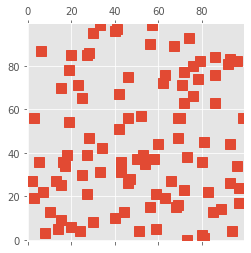

In [74]:
# import scipy module for sparse matrices
import scipy.sparse as spp

# sparse identity matrix
D = spp.eye(100)

# random sparse matrix
R = spp.random(100,100,density=0.01)

# plot a sparse matrix
import matplotlib.pyplot as plt
plt.spy(R)

And that's about all the math you need to know :-)

<br />
<center>
<img src = ipynb.images/Calvin_and_hobbes._teacher.gif width = 400 />
</center>
<br />

<div style="text-align: right; color: gray">10</div>

## Cooldown
- Wow, this notebook was a real ***workout***. My forearms and fingers are hurting from all the climbing. Can we rest a little bit, professor?


- Yes, let's cool down with some linear algebra. 

Linear algebra in n-dimensional space is all about climbing a mountain in n dimensions, and each step can be represented by multiplying the position vector of the mountain climber by a step-matrix, to move to a new position represented by a new position vector. The position vector is just the arrow from the origin (start of the climb) to the current position of the climber. So as the mountain climber moves, that vector essentially rotates around its axis (the origin), and thus matrix multiplication is essentially a **solid rotation**. A matrix describes a specific kind of mountain move. For that mountain move, the matrice's eigenvectors describe all possible position vectors that are parallel before and after the move, while its eigenvalues describe by how much the climber has actually moved in that direction.

Math is ***simple*** when explained, right? 
</br >
<center>
<img src="ipynb.images/warmup.png" width=200 />
</center>

</br >
<center>
<img src="ipynb.images/bouldering.jpg" width=600 />
</center>

In short, matrices represent **rigid transformations** in vector space, mapping one **state vector** to another state vector.

In [75]:
import numpy as np

theta = np.deg2rad(45)
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),  np.cos(theta), 0],
              [            0,              0, 1]])

print("R times the x-axis:", R @ [1, 0, 0])
print()
print("R times the y-axis:", R @ [0, 1, 0])
print()
print("R times a 45 degree vector:", R @ [1, 1, 0])

R times the x-axis: [0.70710678 0.70710678 0.        ]

R times the y-axis: [-0.70710678  0.70710678  0.        ]

R times a 45 degree vector: [0.         1.41421356 0.        ]


Since multiplying a vector by $R$ rotates it 45 degrees, multiplying the result
by $R$ again should result in the original vector being rotated 90 degrees.
Matrix multiplication is associative, which means that $R(Rv) = (RR)v$, so
$S = RR$ should rotate vectors by 90 degrees around the z-axis. Let's check.

In [76]:
S = R @ R
S @ [1, 0, 0]

array([4.26642159e-17, 1.00000000e+00, 0.00000000e+00])

In [77]:
print("R @ z-axis:", R @ [0, 0, 1])

R @ z-axis: [0. 0. 1.]


R rotates both the x and y axes, but not the z-axis.

What does that make the z-axis? If you thought that's an **eigenvector** of R, that is the *right answer*! What is its eigenvalue?

See, if you're a mountain climber, linear algebra and eigenvectors come naturally to you.

If you've never climbed a mountain and linear algebra remains a little bit of challenge, you could pick up an introductory linear algebra textbook, e.g. Gil Strang's [Linear Algebra](http://math.mit.edu/~gs/linearalgebra/) and its Applications. It's free. 

</br >
<center>
<img src="ipynb.images/wink.jpg" width=100 />
</center>

Next class we see how linear algebra helps us solve graph problems, and helps us build model-building machines.